In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import torch
from matplotlib.ticker import MaxNLocator
from tqdm import tqdm
import os
import sys

# Set up path to import from src
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.append(src_path)

print("Current working directory:", os.getcwd())
print("Added to sys.path:", src_path)

# Import pokie from pokie.py
from pokie import pokie, pokie_bootstrap

Current working directory: /Users/sammysharief/Downloads/Pokie/notebook
Added to sys.path: /Users/sammysharief/Downloads/Pokie/src


In [2]:
def plot_pokie(results, name, title, folder):
    # Create a figure with two subplots
    fig, axs = plt.subplots(figsize=(20, 10))
    plt.rcParams.update({'font.size': 30})
    # Increase x tick size
    plt.xticks(fontsize=40)
    # Increase y tick size
    plt.yticks(fontsize=40)
    l_values = np.linspace(0, len(results) - 1, len(results))
    l_values = np.array(l_values)
    plt.plot(l_values, results, 'o-', label='Probability', markersize=20)
    plt.xlabel("Posteriors", fontsize=50)
    plt.ylabel("Probability ", fontsize=50)
    plt.title(f"{name}", fontsize = 50)
    # X axis are only 0, 1, 2, 3
    plt.xticks(l_values)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.savefig(f'./Plots/{folder}/{title}.pdf')
    plt.show()

In [3]:
# load in the .pt files in Downloads/samples
truth = torch.load('/Users/sammysharief/Downloads/samples/true.pt', map_location=torch.device('cpu'))
posterior4 = torch.load('/Users/sammysharief/Downloads/samples/posterior4.pt', map_location=torch.device('cpu'))
posterior3 = torch.load('/Users/sammysharief/Downloads/samples/posterior3.pt', map_location=torch.device('cpu'))
posterior2 = torch.load('/Users/sammysharief/Downloads/samples/posterior2.pt', map_location=torch.device('cpu'))
posterior1 = torch.load('/Users/sammysharief/Downloads/samples/posterior1.pt', map_location=torch.device('cpu'))
posterior0 = torch.load('/Users/sammysharief/Downloads/samples/posterior0.pt', map_location=torch.device('cpu'))
observations = torch.load('/Users/sammysharief/Downloads/samples/observations.pt', map_location=torch.device('cpu'))

In [4]:
x_obs = truth
y_obs = observations
post_samp0 = posterior0
post_samp1 = posterior1
post_samp2 = posterior2
post_samp3 = posterior3

# Find max and min for truth, posterior4, posterior3, posterior2, posterior1, posterior0, observations
truth_max = torch.max(truth)
truth_min = torch.min(truth)

posterior4_max = torch.max(posterior4)
posterior4_min = torch.min(posterior4)

posterior3_max = torch.max(posterior3)
posterior3_min = torch.min(posterior3)

posterior2_max = torch.max(posterior2)
posterior2_min = torch.min(posterior2)

posterior1_max = torch.max(posterior1)
posterior1_min = torch.min(posterior1)

posterior0_max = torch.max(posterior0)
posterior0_min = torch.min(posterior0)

observations_max = torch.max(observations)
observations_min = torch.min(observations)

# Identify the max and min of all the data
max_data = truth_max
min_data = truth_min

# Normalize the data based on max_data and min_data
truth = (truth - min_data) / (max_data - min_data)
posterior4 = (posterior4 - min_data) / (max_data - min_data + 1e-10)
posterior3 = (posterior3 - min_data) / (max_data - min_data + 1e-10)
posterior2 = (posterior2 - min_data) / (max_data - min_data + 1e-10)
posterior1 = (posterior1 - min_data) / (max_data - min_data + 1e-10)
posterior0 = (posterior0 - min_data) / (max_data - min_data + 1e-10)

print(f'Truth max: {torch.max(truth)} and min: {torch.min(truth)}')
print(f'Posterior4 max: {torch.max(posterior4)} and min: {torch.min(posterior4)}')
print(f'Posterior3 max: {torch.max(posterior3)} and min: {torch.min(posterior3)}')
print(f'Posterior2 max: {torch.max(posterior2)} and min: {torch.min(posterior2)}')
print(f'Posterior1 max: {torch.max(posterior1)} and min: {torch.min(posterior1)}')
print(f'Posterior0 max: {torch.max(posterior0)} and min: {torch.min(posterior0)}')

# Reshape the Truth 
truth = truth.reshape(16, 64 * 64 * 3)

# Reshape all posteriors from 16,3,64,64 to 16,64,3x64x64
posterior3_reshape = posterior3.reshape(16, 64, 64 * 64 * 3)
posterior2_reshape = posterior2.reshape(16, 64, 64 * 64 * 3)
posterior1_reshape = posterior1.reshape(16, 64, 64 * 64 * 3)
posterior0_reshape = posterior0.reshape(16, 64, 64 * 64 * 3)

# Make truth, posterior0, posterior1, posterior2, posterior3, posterior4, observations into numpy arrays
truth = truth.numpy()
posterior3_reshape = posterior3_reshape.numpy()
posterior2_reshape = posterior2_reshape.numpy()
posterior1_reshape = posterior1_reshape.numpy()
posterior0_reshape = posterior0_reshape.numpy()

Truth max: 1.0 and min: 0.0
Posterior4 max: 0.8527698516845703 and min: -0.010756193660199642
Posterior3 max: 0.771514356136322 and min: -0.006224202457815409
Posterior2 max: 0.6889628767967224 and min: -0.0005897657829336822
Posterior1 max: 1.0044115781784058 and min: -0.013637484982609749
Posterior0 max: 1.038083791732788 and min: -2.8896414733026177e-05


In [5]:
print(f'Shape of GT: {truth.shape}')
print(f'Shape of Posterior3: {posterior3_reshape.shape}')
print(f'Shape of Posterior2: {posterior2_reshape.shape}')
print(f'Shape of Posterior1: {posterior1_reshape.shape}')
print(f'Shape of Posterior0: {posterior0_reshape.shape}')
posterior = [posterior0_reshape, posterior1_reshape, posterior2_reshape, posterior3_reshape]
posterior = np.array(posterior)
print(f'Shape of Posterior: {posterior.shape}')

Shape of GT: (16, 12288)
Shape of Posterior3: (16, 64, 12288)
Shape of Posterior2: (16, 64, 12288)
Shape of Posterior1: (16, 64, 12288)
Shape of Posterior0: (16, 64, 12288)
Shape of Posterior: (4, 16, 64, 12288)


In [6]:
posterior = [posterior0_reshape, posterior1_reshape, posterior2_reshape, posterior3_reshape]
posterior = np.array(posterior)
results, calibrated, n_over_N_vals = pokie(truth, posterior, num_runs=100)
print(f'Results: {results}')
print(f'Calibration: {calibrated}')

100%|██████████| 100/100 [00:09<00:00, 10.94it/s]

Results: [0.29357259 0.25352661 0.23095806 0.22194274]
Calibration: [0.66335937 0.57287109 0.521875   0.50150391]


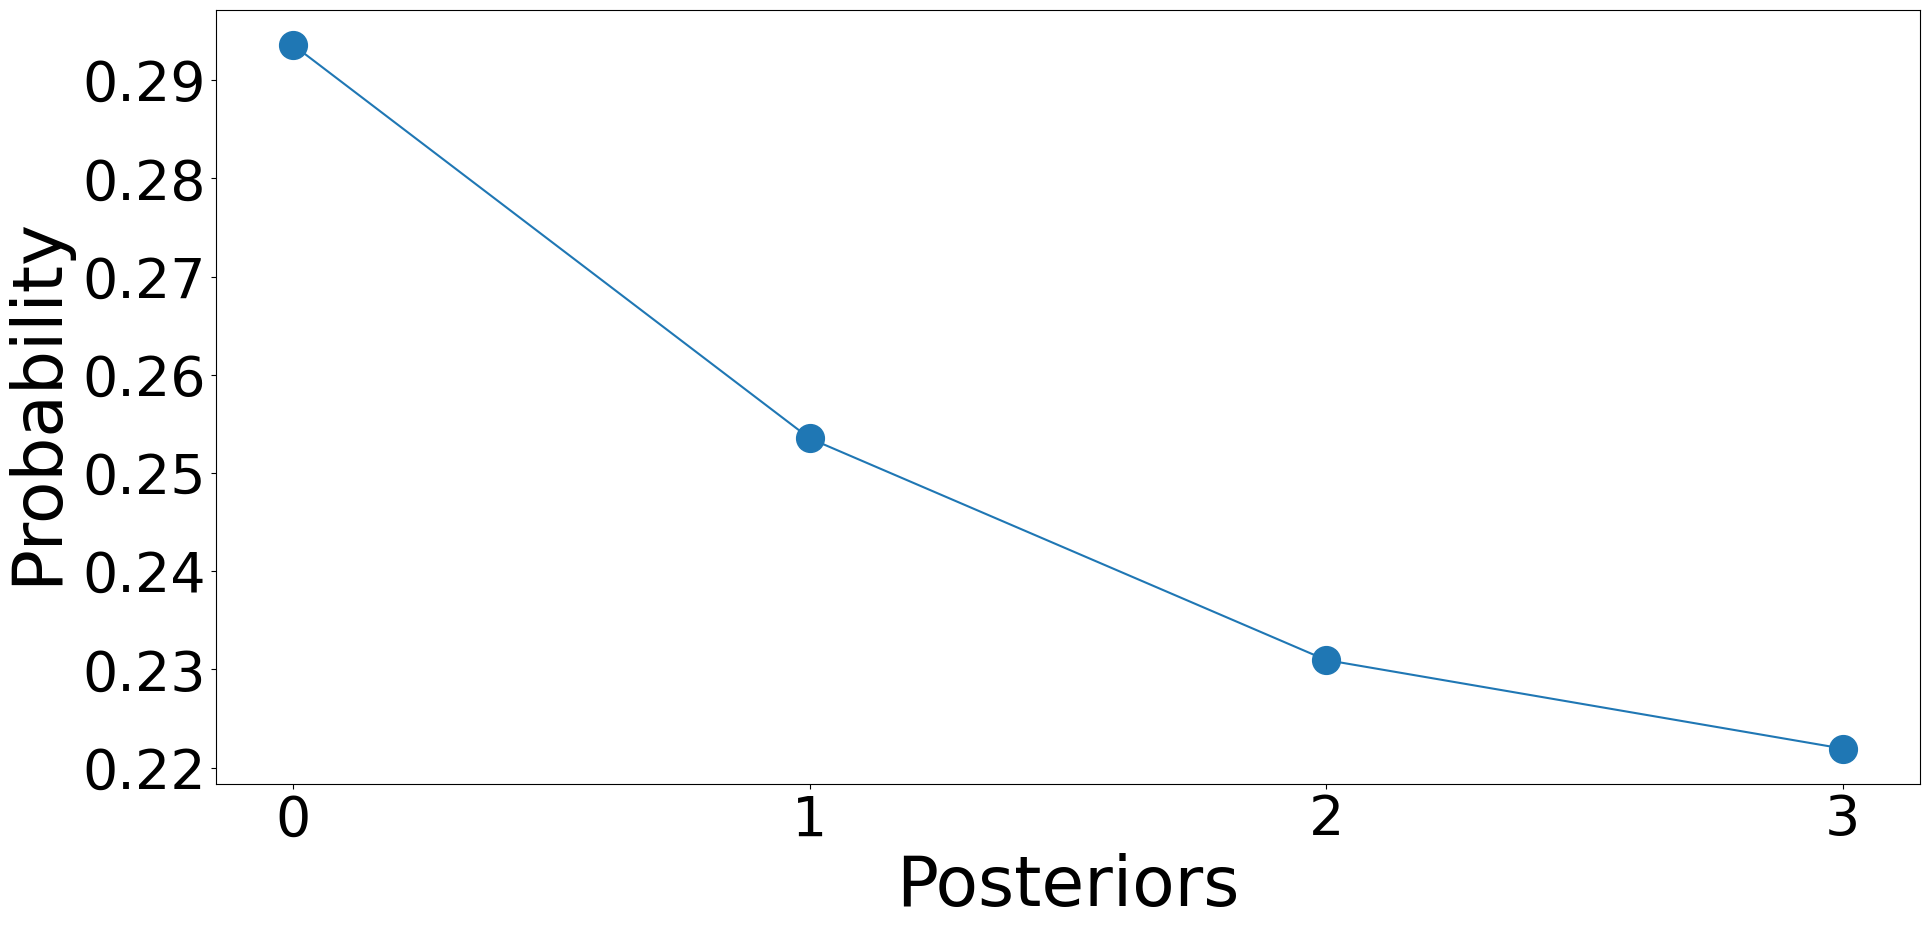

In [7]:
plot_pokie(results, name = '', title = 'Pokie_Lens_Normalized', folder = 'Lensed_Images')

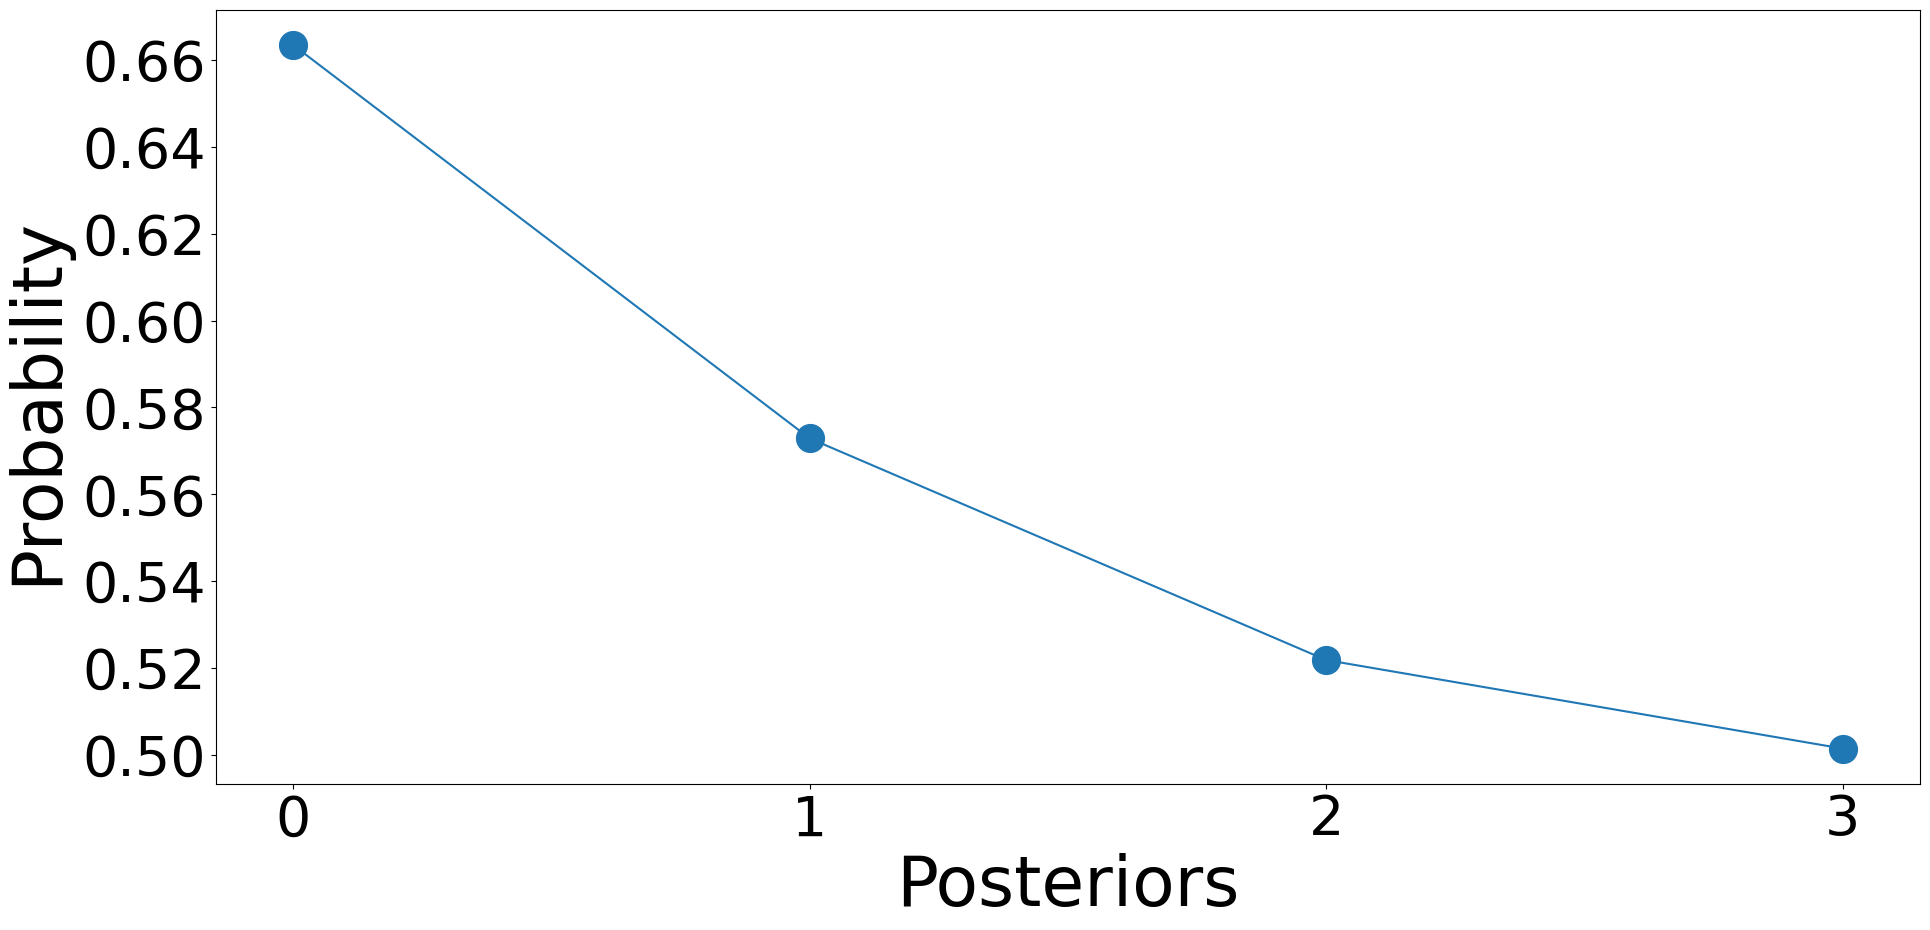

In [8]:
plot_pokie(calibrated, name = '', title = 'Pokie_Lens_UnNormalized', folder = 'Lensed_Images')

# Bootstrap

In [9]:
posterior = [posterior0_reshape, posterior1_reshape, posterior2_reshape, posterior3_reshape]
posterior = np.array(posterior)

bootstrap_results, bootstrap_calibration, n_over_N_vals = pokie_bootstrap(truth, posterior, num_bootstrap=5)

# Mean Across Columns
bootstrap_results = np.mean(bootstrap_results, axis=0)
# Mean Across Columns
bootstrap_calibration = np.mean(bootstrap_calibration, axis=0)

print(f'Bootstrap Results: {bootstrap_results}')
print(f'Bootstrap Calibration: {bootstrap_calibration}')


100%|██████████| 100/100 [00:09<00:00, 11.00it/s]

Bootstrap Results: [0.29113167 0.25923285 0.22777179 0.2218637 ]
Bootstrap Calibration: [0.654125   0.58239453 0.51168164 0.49844141]


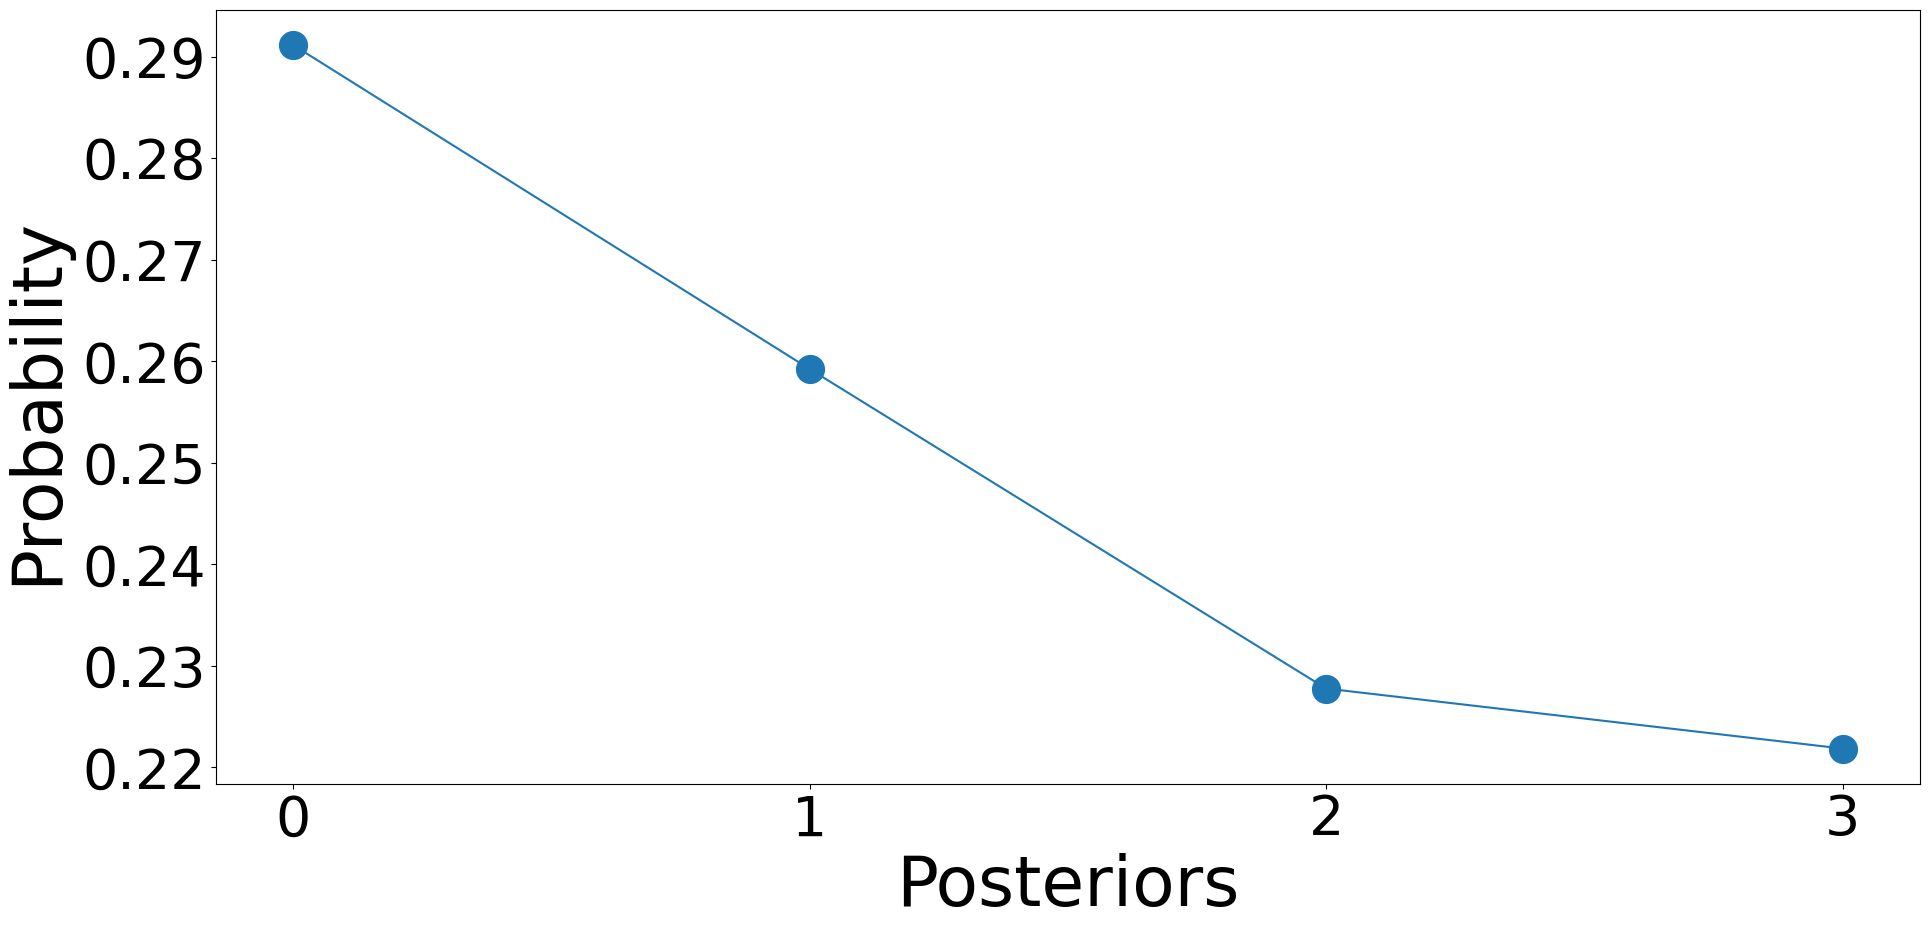

In [10]:
plot_pokie(bootstrap_results, name = '', title = 'Pokie_Bootstrap_Lens_Normalized', folder = 'Lensed_Images')

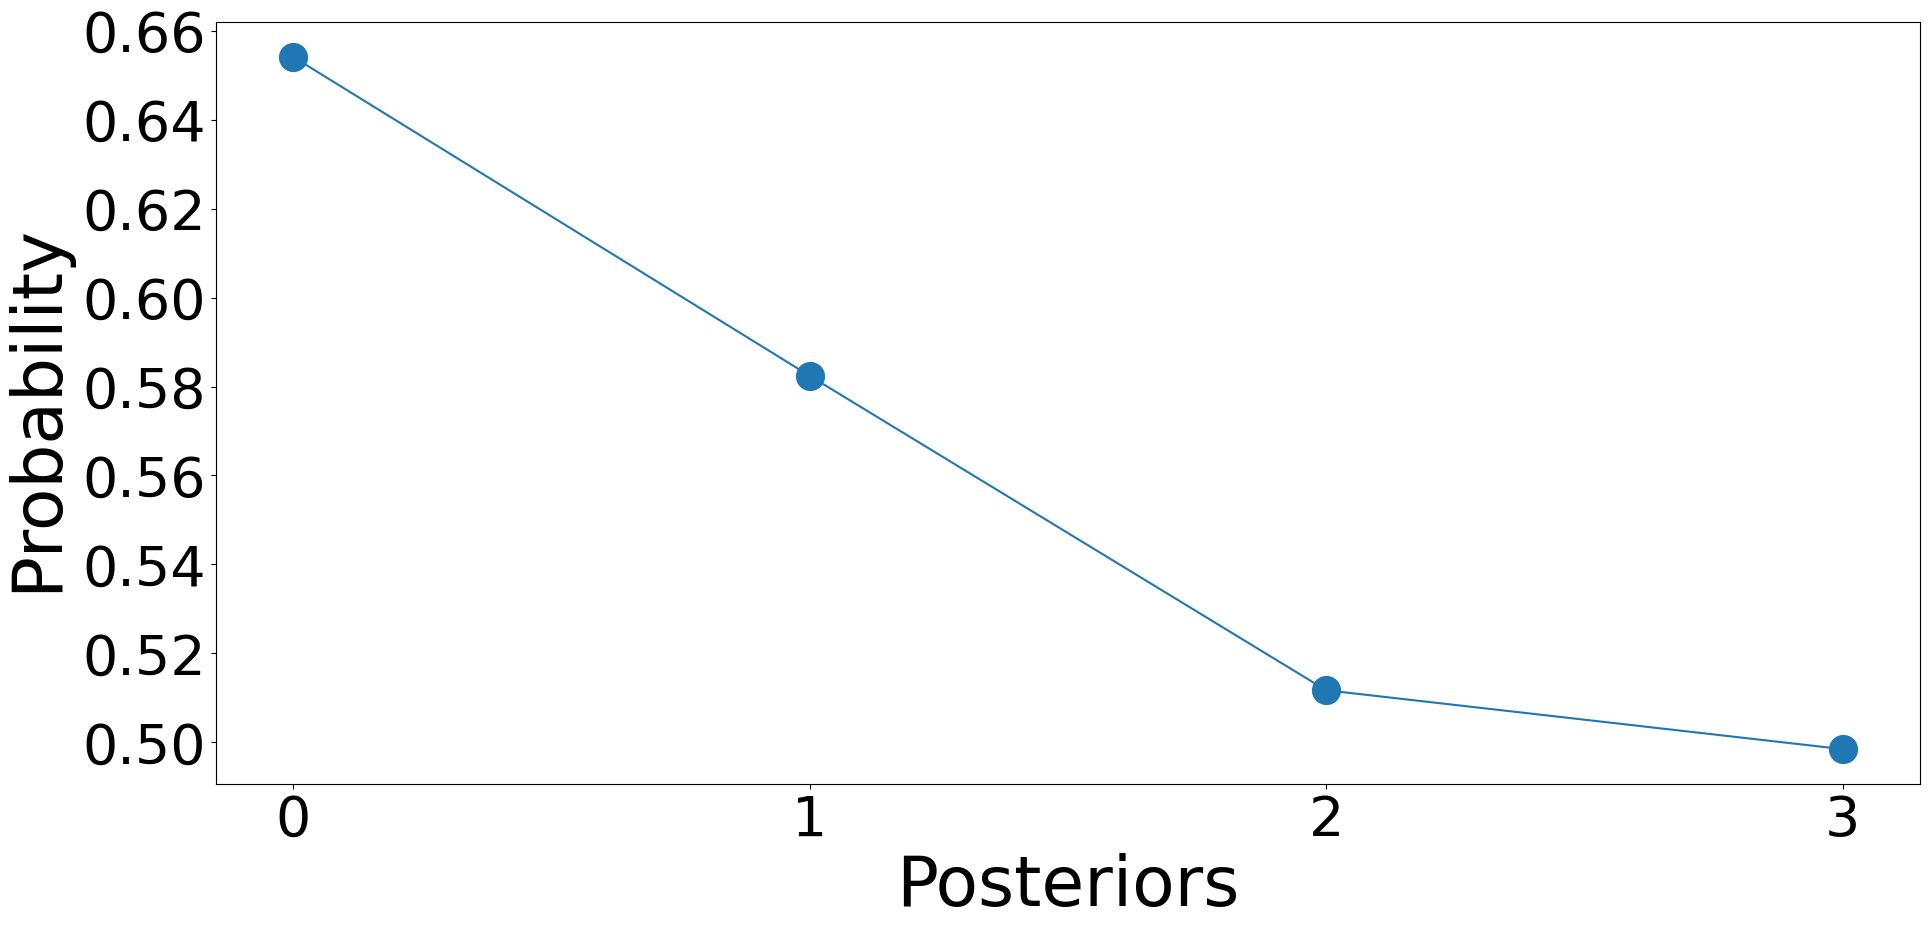

In [11]:
plot_pokie(bootstrap_calibration, name = '', title = 'Pokie_Bootstrap_Lens_UnNormalized', folder = 'Lensed_Images')

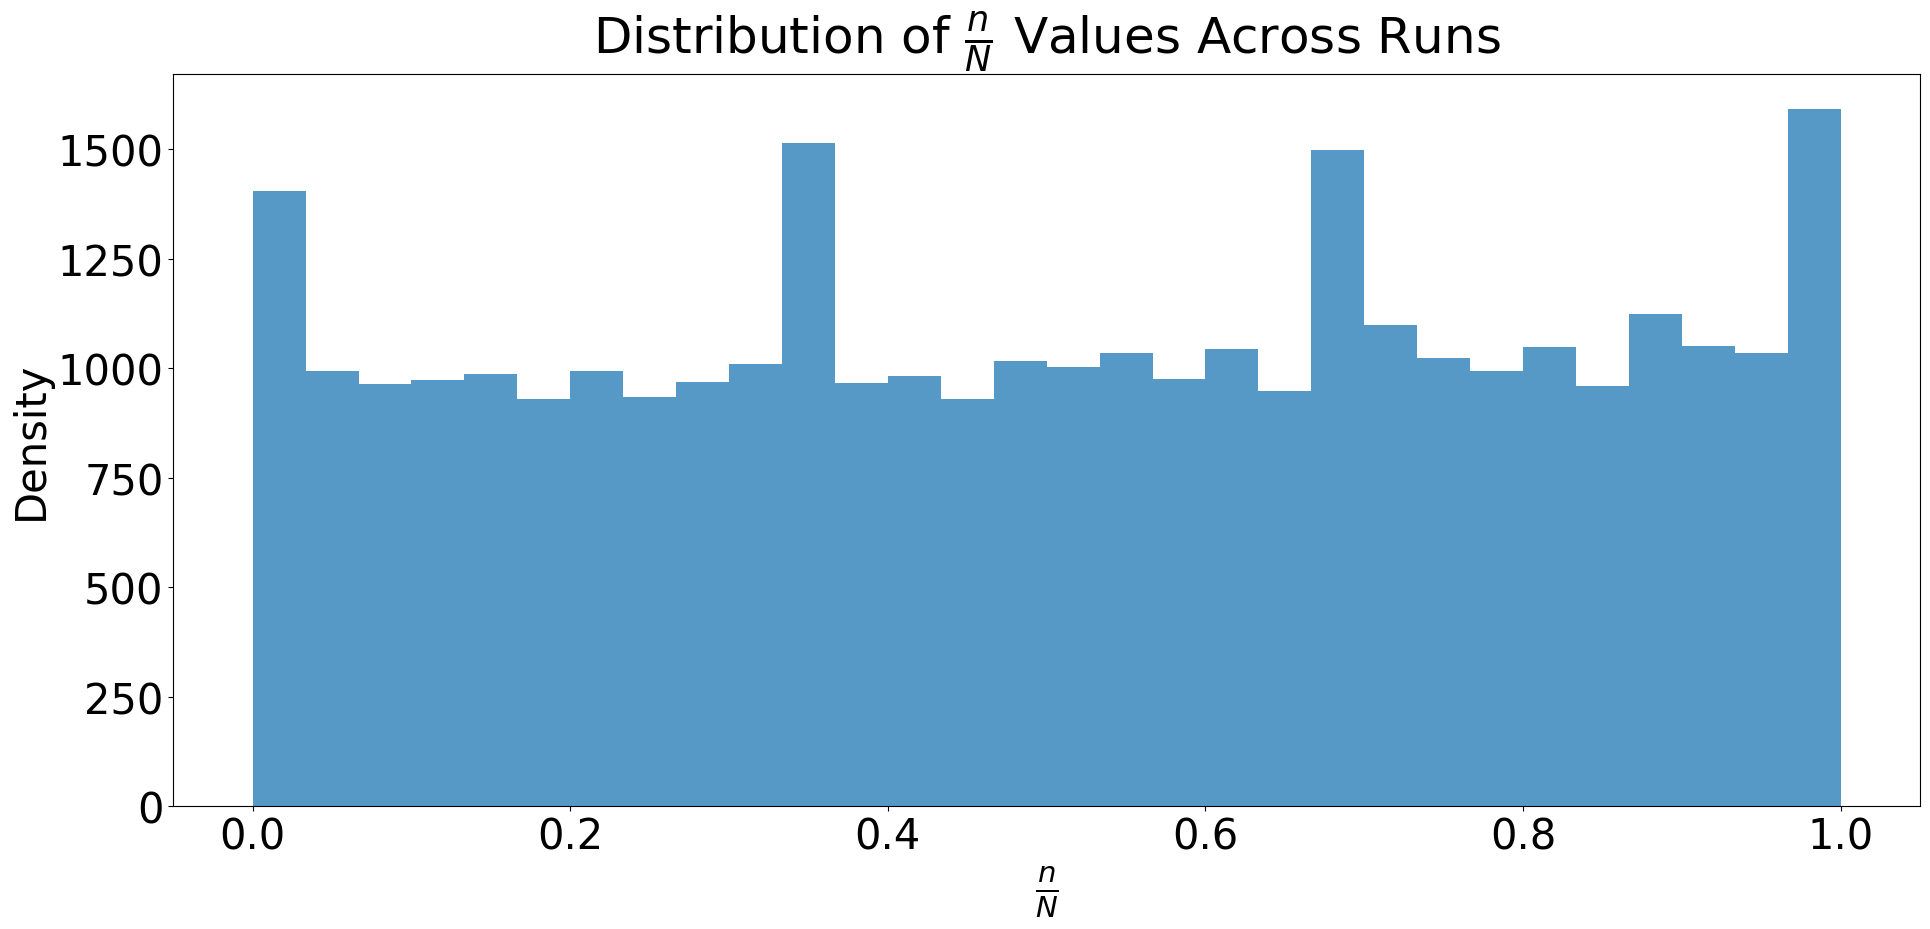

In [12]:
plt.figure(figsize=(20, 10))
plt.hist(n_over_N_vals, bins=30, alpha=0.75)
plt.title(r"Distribution of $\frac{n}{N}$ Values Across Runs")
plt.xlabel(r"$\frac{n}{N}$")
plt.ylabel("Density")
plt.tight_layout()
plt.savefig(f'./Plots/Lensed_Images/Pokie_Bootstrap_Distribution_n_over_N.pdf')
plt.show()